In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import sqlite3 as sql
import re
from datetime import datetime
import matplotlib.pyplot as plt
!pip install plotly_express==0.4.0
import plotly.express as px
#import geopandas as gpd
%matplotlib inline




In [2]:
#!pip install openpyxl


In [3]:
police_calls=pd.read_excel("../drive-download-20220404T141044Z-001/Mental_Calls_by_Precinct_Plain_Text_Incident_Types_070121_022822.xlsx")

In [4]:
police_calls

,Precinct,Date,Created,Address,Incident Type,Priority
0,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2
1,C,07-01-2021,03:02:52,920 BROADWAY,WELFARE CHECK,2
2,C,07-01-2021,05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2
3,C,07-01-2021,05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2
4,C,07-01-2021,08:01:06,1033 DEMONBREUN ST,TRESPASSER,2
...,...,...,...,...,...,...
48014,W,03-31-2022,11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2
48015,W,03-31-2022,12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2
48016,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2
48017,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2


In [5]:
police_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48019 entries, 0 to 48018
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Precinct       48019 non-null  object
 1   Date           47927 non-null  object
 2   Created        47927 non-null  object
 3   Address        47927 non-null  object
 4   Incident Type  47927 non-null  object
 5   Priority       47927 non-null  object
dtypes: object(6)
memory usage: 2.2+ MB


In [6]:
police_calls=police_calls.dropna()

In [7]:
police_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47927 entries, 0 to 48018
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Precinct       47927 non-null  object
 1   Date           47927 non-null  object
 2   Created        47927 non-null  object
 3   Address        47927 non-null  object
 4   Incident Type  47927 non-null  object
 5   Priority       47927 non-null  object
dtypes: object(6)
memory usage: 2.6+ MB


In [8]:
#there is an extra row 42490 because when I joined two datasets in excel the header from march dataset got added.
police_calls.loc[police_calls.Precinct=='Precinct']

,Precinct,Date,Created,Address,Incident Type,Priority
42490,Precinct,Date,Created,Address,Incident Type,Priority


In [9]:
#using the index number I can drop the row.

police_calls=police_calls.drop(index=42490)

In [10]:
police_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47926 entries, 0 to 48018
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Precinct       47926 non-null  object
 1   Date           47926 non-null  object
 2   Created        47926 non-null  object
 3   Address        47926 non-null  object
 4   Incident Type  47926 non-null  object
 5   Priority       47926 non-null  object
dtypes: object(6)
memory usage: 2.6+ MB


In [11]:
police_calls['Precinct'].value_counts()

H       7957
S       7953
C       6870
MT      5973
N       5515
M       4867
E       4408
W       4258
CW       118
PCW        4
CMD1       2
CMD2       1
Name: Precinct, dtype: int64

In [12]:
conn = sql.connect("../census.sqlite")
cur = conn.cursor()

In [13]:
# Execute tells the cursor to run the query provided


cur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")

# fetchall() allows us to see everything returned by our query, which we store in our 'available_tables' variable
available_tables = (cur.fetchall())

In [14]:
print(available_tables)

[('B01001',), ('B03002',), ('B11001',), ('B11002',), ('B15002',), ('B19001',), ('B19013',), ('B19301',), ('B25024',), ('B25075',), ('S1701',)]


In [15]:
# Let's check to see what our data looks like by selecting the first 5 rows

cur.execute("SELECT * FROM B01001 LIMIT 5;")

B01001 = (cur.fetchall())

In [16]:
type(B01001)

list

In [17]:
B01001

[(0,
  '1400000US47037010103',
  'Census Tract 101.03, Davidson County, Tennessee',
  10103,
  37,
  47,
  'B01001_001E',
  2533,
  'Estimate!!Total:'),
 (1,
  '1400000US47037010104',
  'Census Tract 101.04, Davidson County, Tennessee',
  10104,
  37,
  47,
  'B01001_001E',
  2955,
  'Estimate!!Total:'),
 (2,
  '1400000US47037010105',
  'Census Tract 101.05, Davidson County, Tennessee',
  10105,
  37,
  47,
  'B01001_001E',
  4435,
  'Estimate!!Total:'),
 (3,
  '1400000US47037010106',
  'Census Tract 101.06, Davidson County, Tennessee',
  10106,
  37,
  47,
  'B01001_001E',
  3397,
  'Estimate!!Total:'),
 (4,
  '1400000US47037010201',
  'Census Tract 102.01, Davidson County, Tennessee',
  10201,
  37,
  47,
  'B01001_001E',
  4157,
  'Estimate!!Total:')]

In [18]:
# Using the same query as before to select the first 5 rows and saving it to a new df.
pop_by_age_sex_df = pd.read_sql("SELECT * FROM B01001;", conn)

In [19]:
type(pop_by_age_sex_df)

pandas.core.frame.DataFrame

In [20]:
pop_by_age_sex_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B01001_001E,2533,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B01001_001E,2955,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B01001_001E,4435,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B01001_001E,3397,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B01001_001E,4157,Estimate!!Total:


In [21]:
#Now we will use each one of the tables and convert then in datafram and read them in sql, also changed their names.
pop_race_eth_df=pd.read_sql("SELECT* FROM B03002;", conn)

In [22]:
type(pop_race_eth_df)

pandas.core.frame.DataFrame

In [23]:
pop_race_eth_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B03002_001E,2533,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B03002_001E,2955,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B03002_001E,4435,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B03002_001E,3397,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B03002_001E,4157,Estimate!!Total:


In [24]:
hshld_tp_df=pd.read_sql("SELECT* FROM B11001;", conn)

In [25]:
hshld_tp_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B11001_001E,990,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B11001_001E,1221,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B11001_001E,1860,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B11001_001E,1152,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B11001_001E,1731,Estimate!!Total:


In [26]:
pop_hshld_tp_df=pd.read_sql("SELECT* FROM B11002;", conn)

In [27]:
pop_hshld_tp_df

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B11002_001E,2533,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B11002_001E,2955,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B11002_001E,4430,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B11002_001E,3260,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B11002_001E,4157,Estimate!!Total:
...,...,...,...,...,...,...,...,...,...
1927,1927,1400000US47037019400,"Census Tract 194, Davidson County, Tennessee",19400,37,47,B11002_012E,2936,Estimate!!Total:!!In nonfamily households
1928,1928,1400000US47037019500,"Census Tract 195, Davidson County, Tennessee",19500,37,47,B11002_012E,5088,Estimate!!Total:!!In nonfamily households
1929,1929,1400000US47037019600,"Census Tract 196, Davidson County, Tennessee",19600,37,47,B11002_012E,1196,Estimate!!Total:!!In nonfamily households
1930,1930,1400000US47037980100,"Census Tract 9801, Davidson County, Tennessee",980100,37,47,B11002_012E,0,Estimate!!Total:!!In nonfamily households


In [28]:
gender_by_ed_for_pop_over_25_df=pd.read_sql("SELECT* FROM B15002;", conn)

In [29]:
gender_by_ed_for_pop_over_25_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B15002_001E,1872,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B15002_001E,2349,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B15002_001E,3621,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B15002_001E,2301,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B15002_001E,3163,Estimate!!Total:


In [30]:
hshld_inc_df=pd.read_sql("SELECT* FROM B19001;", conn)

In [31]:
hshld_inc_df

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B19001_001E,990,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B19001_001E,1221,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B19001_001E,1860,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B19001_001E,1152,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B19001_001E,1731,Estimate!!Total:
...,...,...,...,...,...,...,...,...,...
2732,2732,1400000US47037019400,"Census Tract 194, Davidson County, Tennessee",19400,37,47,B19001_017E,311,"Estimate!!Total:!!$200,000 or more"
2733,2733,1400000US47037019500,"Census Tract 195, Davidson County, Tennessee",19500,37,47,B19001_017E,654,"Estimate!!Total:!!$200,000 or more"
2734,2734,1400000US47037019600,"Census Tract 196, Davidson County, Tennessee",19600,37,47,B19001_017E,99,"Estimate!!Total:!!$200,000 or more"
2735,2735,1400000US47037980100,"Census Tract 9801, Davidson County, Tennessee",980100,37,47,B19001_017E,0,"Estimate!!Total:!!$200,000 or more"


In [32]:
median_hshld_inc_df=pd.read_sql("SELECT* FROM B19013;", conn)

In [33]:
median_hshld_inc_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B19013_001E,70341,Estimate!!Median household income in the past ...
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B19013_001E,64844,Estimate!!Median household income in the past ...
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B19013_001E,64688,Estimate!!Median household income in the past ...
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B19013_001E,63864,Estimate!!Median household income in the past ...
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B19013_001E,62829,Estimate!!Median household income in the past ...


In [34]:
inc_per_cap_df=pd.read_sql("SELECT* FROM B19301;", conn)

In [35]:
inc_per_cap_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B19301_001E,33867,Estimate!!Per capita income in the past 12 mon...
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B19301_001E,38506,Estimate!!Per capita income in the past 12 mon...
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B19301_001E,35122,Estimate!!Per capita income in the past 12 mon...
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B19301_001E,30843,Estimate!!Per capita income in the past 12 mon...
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B19301_001E,34567,Estimate!!Per capita income in the past 12 mon...


In [36]:
str_typ_df=pd.read_sql("SELECT* FROM B25024;", conn)

In [37]:
str_typ_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B25024_001E,1022,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B25024_001E,1382,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B25024_001E,1958,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B25024_001E,1186,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B25024_001E,1826,Estimate!!Total:


In [38]:
ownr_occ_val_df=pd.read_sql("SELECT* FROM B25075;", conn)

In [39]:
ownr_occ_val_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B25075_001E,873,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B25075_001E,975,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B25075_001E,1626,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B25075_001E,885,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B25075_001E,1356,Estimate!!Total:


In [40]:
pov_status_df=pd.read_sql("SELECT* FROM S1701;", conn)

In [41]:
pov_status_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037015631,"Census Tract 156.31, Davidson County, Tennessee",15631,37,47,S1701_C01_001E,12144.0,Estimate!!Total!!Population for whom poverty s...
1,1,1400000US47037015804,"Census Tract 158.04, Davidson County, Tennessee",15804,37,47,S1701_C01_001E,4093.0,Estimate!!Total!!Population for whom poverty s...
2,2,1400000US47037017701,"Census Tract 177.01, Davidson County, Tennessee",17701,37,47,S1701_C01_001E,2466.0,Estimate!!Total!!Population for whom poverty s...
3,3,1400000US47037017702,"Census Tract 177.02, Davidson County, Tennessee",17702,37,47,S1701_C01_001E,3511.0,Estimate!!Total!!Population for whom poverty s...
4,4,1400000US47037018301,"Census Tract 183.01, Davidson County, Tennessee",18301,37,47,S1701_C01_001E,8222.0,Estimate!!Total!!Population for whom poverty s...


In [42]:
# I was trying to find how many mental illness type of incident calls did precinct N got by running a sql query
# but it didnt work because police_calls data is from excel file, sql queries in python will only work if I am trying it 
# using sqlite.
query = '''
SELECT *
FROM police_calls
WHERE Precinct = N AND Incident Type = Mental Illness;
'''

In [43]:
police_calls['Precinct'].describe()

count     47926
unique       12
top           H
freq       7957
Name: Precinct, dtype: object

In [44]:
#using value counts I can see the sum of each value in that column
police_calls['Incident Type'].value_counts()

DISORDERLY SUBJECT      15568
ASSIST EMS              10043
WELFARE CHECK            9545
TRESPASSER               4023
SUSPICIOUS PERSON        2797
DOMESTIC DISTURBANCE     2661
SUICIDAL PERSON          1725
MENTAL CONDITION         1266
INTOXICATED PERSON        298
Name: Incident Type, dtype: int64

In [45]:
police_calls

,Precinct,Date,Created,Address,Incident Type,Priority
0,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2
1,C,07-01-2021,03:02:52,920 BROADWAY,WELFARE CHECK,2
2,C,07-01-2021,05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2
3,C,07-01-2021,05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2
4,C,07-01-2021,08:01:06,1033 DEMONBREUN ST,TRESPASSER,2
...,...,...,...,...,...,...
48014,W,03-31-2022,11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2
48015,W,03-31-2022,12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2
48016,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2
48017,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2


In [46]:
#making a new dataframe and saving each precinct with incident type individually
# IN THIS LINE OF CODE- locating precinct S and Incident Type - MENTAL CONDITION in a new dataframe ps(precinct S)
ps=police_calls.loc[(police_calls['Precinct']=='S') & (police_calls['Incident Type']=='MENTAL CONDITION')]

In [47]:
ps

,Precinct,Date,Created,Address,Incident Type,Priority
4043,S,07-01-2021,11:44:57,5221 HARDING PL,MENTAL CONDITION,2M
4044,S,07-01-2021,11:48:03,5221 HARDING PL,MENTAL CONDITION,2M
4049,S,07-01-2021,14:02:23,84 LESTER AVE,MENTAL CONDITION,2
4072,S,07-02-2021,10:23:07,3104 KINWOOD DR,MENTAL CONDITION,3
4097,S,07-03-2021,11:29:10,985 MURFREESBORO PIKE,MENTAL CONDITION,2M
...,...,...,...,...,...,...
47422,S,03-26-2022,22:20:16,3705 WINDSHORE WAY,MENTAL CONDITION,2M
47433,S,03-27-2022,09:36:34,1097 RURAL HILL RD,MENTAL CONDITION,2M
47464,S,03-28-2022,09:46:31,BRILEY PKWY N / I24 E,MENTAL CONDITION,2M
47511,S,03-30-2022,08:19:58,2421 MURFREESBORO PIKE,MENTAL CONDITION,2M


In [48]:
pc=police_calls.loc[(police_calls['Precinct']== 'C') & (police_calls['Incident Type']=='MENTAL CONDITION')]

In [49]:
pc

,Precinct,Date,Created,Address,Incident Type,Priority
9,C,07-01-2021,09:21:46,THE ARCADE,MENTAL CONDITION,3
12,C,07-01-2021,11:14:27,705 DREXEL ST,MENTAL CONDITION,2
38,C,07-02-2021,06:25:35,639 LAFAYETTE ST,MENTAL CONDITION,2
51,C,07-02-2021,15:59:39,615 CHURCH ST,MENTAL CONDITION,2M
121,C,07-04-2021,22:38:33,4TH AVE N / DR MARTIN L KING JR BLVD,MENTAL CONDITION,2M
...,...,...,...,...,...,...
42918,C,03-18-2022,18:54:37,639 LAFAYETTE ST,MENTAL CONDITION,2M
43065,C,03-24-2022,21:14:56,425 REP JOHN LEWIS WAY S,MENTAL CONDITION,2
43150,C,03-28-2022,06:21:31,639 LAFAYETTE ST,MENTAL CONDITION,2
43190,C,03-29-2022,21:39:11,709 REP JOHN LEWIS WAY S,MENTAL CONDITION,3


In [50]:
#Using the .loc method, removing the following precinct CMD1,CMD2,CW,PSW.(THIS METHOD KEEPS ALL THE FOLLOWING PRECINCT AND 
#ANYTHING THAT IS NOT MENTIONED IS NOT DISPLAYED)(PRECINCT N AND H ALREADY HAVE THE PILOT PROGRAM RUNNING SO I REMOVED IT)
police_calls_filtered_without_NH=police_calls.loc[(police_calls['Precinct'] == 'C') 
                 | (police_calls['Precinct']== 'S') | (police_calls['Precinct']== 'MT') 
                 | (police_calls['Precinct']== 'M') | (police_calls['Precinct']== 'E') 
                 | (police_calls['Precinct']== 'W')]  
                                                      

In [51]:
police_calls_filtered_without_NH

,Precinct,Date,Created,Address,Incident Type,Priority
0,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2
1,C,07-01-2021,03:02:52,920 BROADWAY,WELFARE CHECK,2
2,C,07-01-2021,05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2
3,C,07-01-2021,05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2
4,C,07-01-2021,08:01:06,1033 DEMONBREUN ST,TRESPASSER,2
...,...,...,...,...,...,...
48014,W,03-31-2022,11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2
48015,W,03-31-2022,12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2
48016,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2
48017,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2


# this is another way of eliminating precincts..
police_calls_filtered=police_calls_filtered.loc[(police_calls_filtered.Precinct !='CW')&
                                               (police_calls_filtered.Precinct !='PCW')&
                                                (police_calls_filtered.Precinct !='CMD1')&
                                                (police_calls_filtered.Precinct !='CMD2')]

In [52]:
#Using the .loc method, removing the following precinct CMD1,CMD2,CW,PSW.(THIS METHOD KEEPS ALL THE FOLLOWING PRECINCT AND 
#ANYTHING THAT IS NOT MENTIONED IS NOT DISPLAYED)(PRECINCT N AND H ALREADY HAVE THE PILOT PROGRAM RUNNING BUT I STILL ADDED IT)
police_calls_filtered=police_calls.loc[(police_calls['Precinct'] == 'C') 
                 | (police_calls['Precinct']== 'S') | (police_calls['Precinct']== 'MT') 
                 | (police_calls['Precinct']== 'M') | (police_calls['Precinct']== 'E') 
                 | (police_calls['Precinct']== 'W') | (police_calls['Precinct']== 'N')
                 | (police_calls['Precinct']== 'H')]  
                                                      

In [53]:
police_calls_filtered

,Precinct,Date,Created,Address,Incident Type,Priority
0,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2
1,C,07-01-2021,03:02:52,920 BROADWAY,WELFARE CHECK,2
2,C,07-01-2021,05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2
3,C,07-01-2021,05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2
4,C,07-01-2021,08:01:06,1033 DEMONBREUN ST,TRESPASSER,2
...,...,...,...,...,...,...
48014,W,03-31-2022,11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2
48015,W,03-31-2022,12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2
48016,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2
48017,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2


In [54]:
#CREATED A CROSSTAB WHICH ALLOWS US TO SEE #. IT ALIGNED INCIDENT TYPE AS ROWS AND PRECINCT AS COLUMNS
# EG- FOR EACH ASSIST EMS FOR PRECINCT C THERE WERE 1510 CALLS.

precinct_itype_crstb=pd.crosstab(police_calls_filtered['Precinct'], police_calls_filtered['Incident Type'])

In [55]:
precinct_itype_crstb

Incident Type,ASSIST EMS,DISORDERLY SUBJECT,DOMESTIC DISTURBANCE,INTOXICATED PERSON,MENTAL CONDITION,SUICIDAL PERSON,SUSPICIOUS PERSON,TRESPASSER,WELFARE CHECK
Precinct,,,,,,,,,
C,1510,2734,99,73,171,349,171,1023,740
E,887,1457,324,29,110,131,290,291,889
H,1569,2488,528,42,204,284,534,557,1751
M,1119,1368,366,15,116,184,295,288,1116
MT,1250,1938,259,53,141,179,417,557,1179
N,1136,1765,347,14,218,218,290,432,1095
S,1650,2548,559,44,190,237,417,553,1755
W,903,1218,179,28,113,141,370,310,996


<AxesSubplot:>

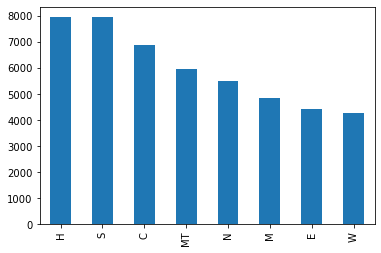

In [56]:
#bar graph showing each precinct on the x axis and calls on they Y axis

police_calls_filtered.Precinct.value_counts().plot(kind='bar')

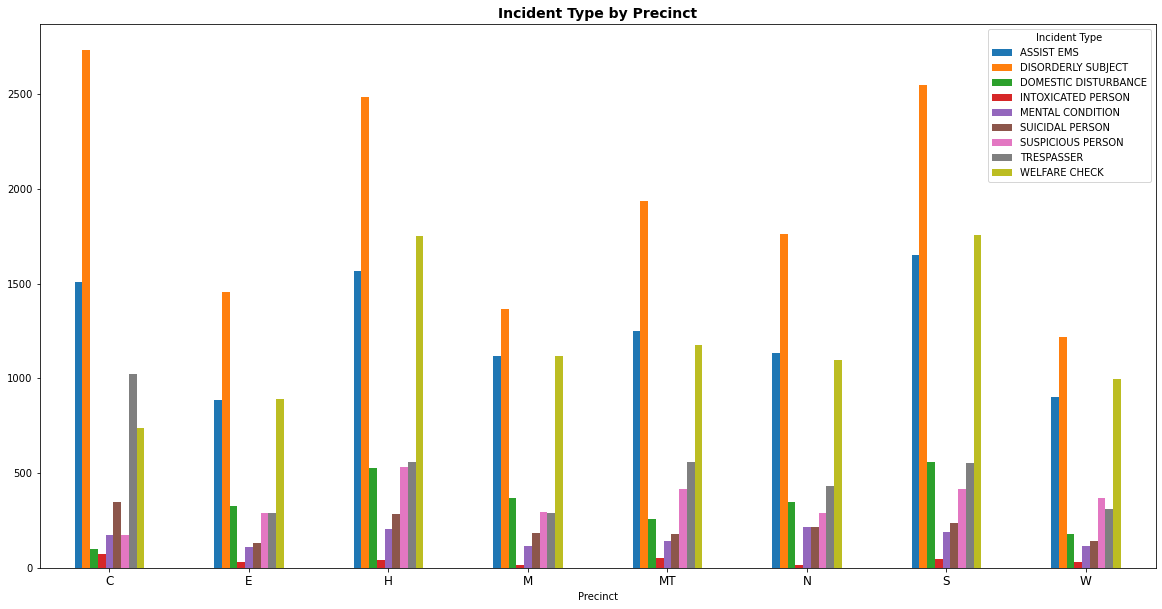

In [57]:
pd.crosstab(police_calls_filtered['Precinct'], police_calls_filtered['Incident Type']).plot(kind = 'bar',
                                                                          figsize = (20, 10))
plt.xticks(rotation = 0,                                               
           fontsize = 12)                   
plt.title('Incident Type by Precinct',                             
         fontsize = 14,
         fontweight = 'bold');

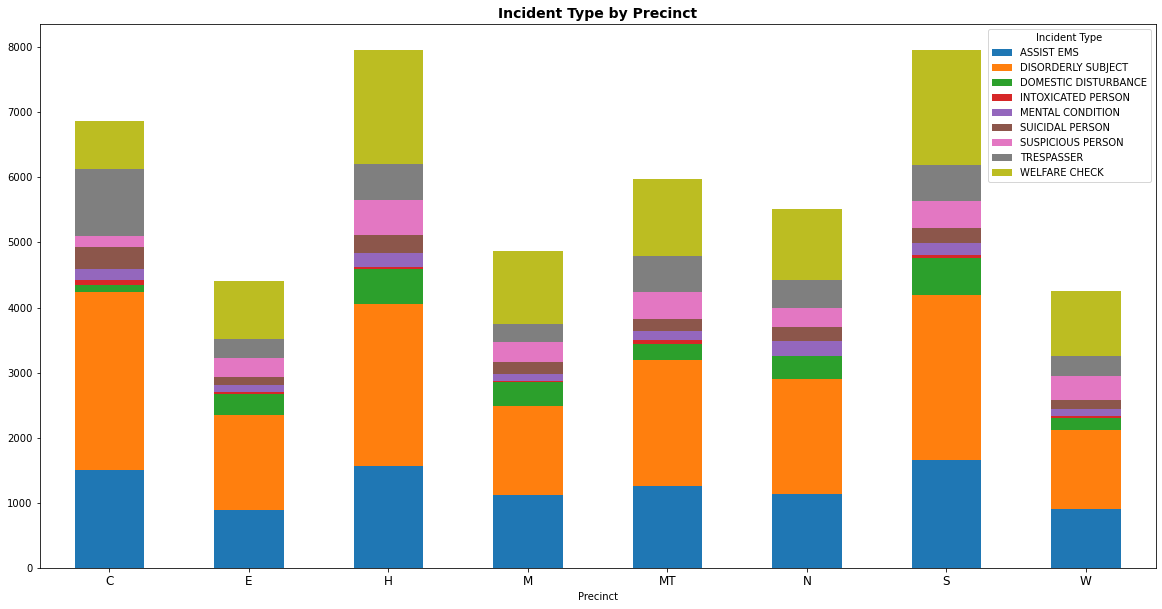

In [58]:
# this is a stacked bar graph representing the same thing as the graph above

pd.crosstab(police_calls_filtered['Precinct'], police_calls_filtered['Incident Type']).plot(kind = 'bar',
                                                                    stacked = True,
                                                                     figsize = (20, 10))
plt.xticks(rotation = 0,                                               
           fontsize = 12)                   
plt.title('Incident Type by Precinct',                             
         fontsize = 14,
         fontweight = 'bold');

In [59]:
pop_by_age_sex_df.head()

,index,GEO_ID,NAME,tract,county,state,variable,value,description
0,0,1400000US47037010103,"Census Tract 101.03, Davidson County, Tennessee",10103,37,47,B01001_001E,2533,Estimate!!Total:
1,1,1400000US47037010104,"Census Tract 101.04, Davidson County, Tennessee",10104,37,47,B01001_001E,2955,Estimate!!Total:
2,2,1400000US47037010105,"Census Tract 101.05, Davidson County, Tennessee",10105,37,47,B01001_001E,4435,Estimate!!Total:
3,3,1400000US47037010106,"Census Tract 101.06, Davidson County, Tennessee",10106,37,47,B01001_001E,3397,Estimate!!Total:
4,4,1400000US47037010201,"Census Tract 102.01, Davidson County, Tennessee",10201,37,47,B01001_001E,4157,Estimate!!Total:


In [60]:
#geocodes=gpd.read_file("../tl_2021_47_tract/tl_2021_47_tract.shp")

In [61]:
#this shows all the counties because COUNTYFP # SHOW ALL THE COUNTIES IN TN.
#geocodes 

In [62]:
#we are only looking into countyfp037 because its the davidson county
#geocodes.loc[geocodes.COUNTYFP=='037']

In [63]:
#ax=precinct_itype_crstb.plot(column='Precinct', figsize= (10,10),  cmap = 'Set1')
#geocodes.plot(ax=ax, column = 'GEOID')

In [64]:
police_calls['Priority'].value_counts()

2     33776
2M    12087
3      1933
3M       87
1        36
2L        2
3Q        1
3H        1
2T        1
2N        1
2R        1
Name: Priority, dtype: int64

In [65]:
police_calls_priority=police_calls_filtered.loc[(police_calls_filtered.Priority !='1')&
                                               (police_calls_filtered.Priority !='2L')&
                                                (police_calls_filtered.Priority !='3Q')&
                                                (police_calls_filtered.Priority !='3H')&
                                                (police_calls_filtered.Priority !='2T')&
                                                (police_calls_filtered.Priority !='2N')&
                                                (police_calls_filtered.Priority !='2R')]

In [66]:
police_calls_priority.value_counts()

Precinct  Date        Created   Address                Incident Type         Priority
W         10-21-2021  22:28:54  6814 CHARLOTTE PIKE    TRESPASSER            2           2
C         01-01-2022  01:06:13  419 BROADWAY           ASSIST EMS            2           1
N         07-05-2021  05:50:33  5515 SCRUGGS LN        DISORDERLY SUBJECT    2           1
          07-04-2021  20:39:09  4448 ASHLAND CITY HWY  SUSPICIOUS PERSON     2           1
                      21:04:25  806 CHARLIE PL         DISORDERLY SUBJECT    2           1
                                                                                        ..
H         09-09-2021  12:36:18  605 VALLEY GROVE CT    DOMESTIC DISTURBANCE  2           1
                      15:05:30  3924 LEBANON PIKE      ASSIST EMS            2           1
                      15:19:43  2324 LEBANON PIKE      DISORDERLY SUBJECT    2           1
                      15:24:13  3423 PERCY PRIEST DR   WELFARE CHECK         2           1
W   

<AxesSubplot:>

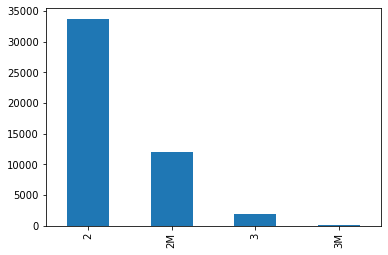

In [67]:
police_calls_priority.Priority.value_counts().plot(kind='bar')

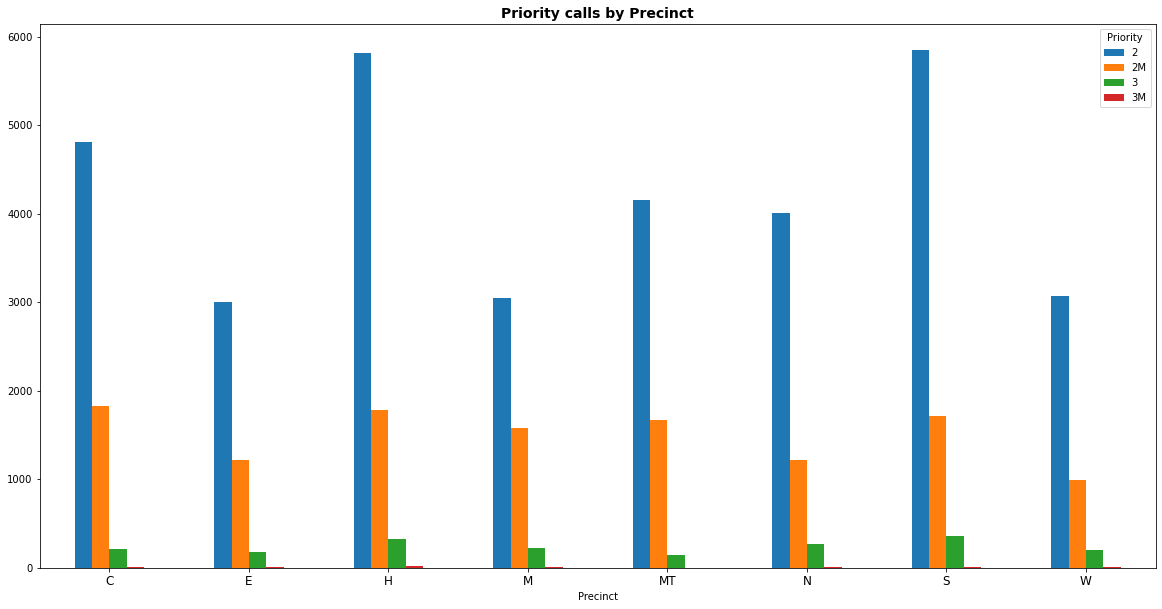

In [68]:
pd.crosstab(police_calls_priority['Precinct'], police_calls_priority['Priority']).plot(kind = 'bar',
                                                                          figsize = (20, 10))
plt.xticks(rotation = 0,                                               
           fontsize = 12)                   
plt.title('Priority calls by Precinct',                             
         fontsize = 14,
         fontweight = 'bold');

In [69]:
police_calls.describe()

,Precinct,Date,Created,Address,Incident Type,Priority
count,47926,47926,47926,47926,47926,47926
unique,12,274,35919,18981,9,11
top,H,10-04-2021,18:28:32,639 LAFAYETTE ST,DISORDERLY SUBJECT,2
freq,7957,233,7,555,15568,33776


In [70]:
print(type(police_calls))

<class 'pandas.core.frame.DataFrame'>


In [71]:
# checking the dtypes of Date, its an object, wont be able to regex so have to change it to datetime format
police_calls.dtypes

Precinct         object
Date             object
Created          object
Address          object
Incident Type    object
Priority         object
dtype: object

In [72]:
#making a copy of police_calls and calling it police_calls_date

police_calls_date=police_calls_filtered.copy()

#change Date column to datetime format- the next line will only change it to date time format but if you want to
#change the date into months then at the end of the datetime format method justtype .dt.month_name()
#police_calls_date['Date']=pd.to_datetime(police_calls['Date'])

police_calls_date['Date']=pd.to_datetime(police_calls['Date']).dt.month_name()

In [73]:
police_calls_date

,Precinct,Date,Created,Address,Incident Type,Priority
0,C,July,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2
1,C,July,03:02:52,920 BROADWAY,WELFARE CHECK,2
2,C,July,05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2
3,C,July,05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2
4,C,July,08:01:06,1033 DEMONBREUN ST,TRESPASSER,2
...,...,...,...,...,...,...
48014,W,March,11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2
48015,W,March,12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2
48016,W,March,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2
48017,W,March,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2


In [74]:
police_calls_date.value_counts()

Precinct  Date       Created   Address              Incident Type       Priority
W         October    22:28:54  6814 CHARLOTTE PIKE  TRESPASSER          2           2
N         February   23:31:40  3810 CLIFTON AVE     WELFARE CHECK       2           1
                     23:20:55  3810 CLIFTON AVE     WELFARE CHECK       2M          1
                     23:21:24  801 JEFFERSON ST     ASSIST EMS          2           1
                     23:21:36  3810 CLIFTON AVE     WELFARE CHECK       2           1
                                                                                   ..
H         March      13:11:51  3343 BELL RD         WELFARE CHECK       2           1
                     13:12:47  154 MCGAVOCK PIKE    DISORDERLY SUBJECT  2           1
                     13:15:55  832 ROYAL PKWY       SUSPICIOUS PERSON   2           1
                     13:17:04  1 TERMINAL DR        WELFARE CHECK       2M          1
W         September  23:57:23  8353 HIGHWAY 100     MENTAL 

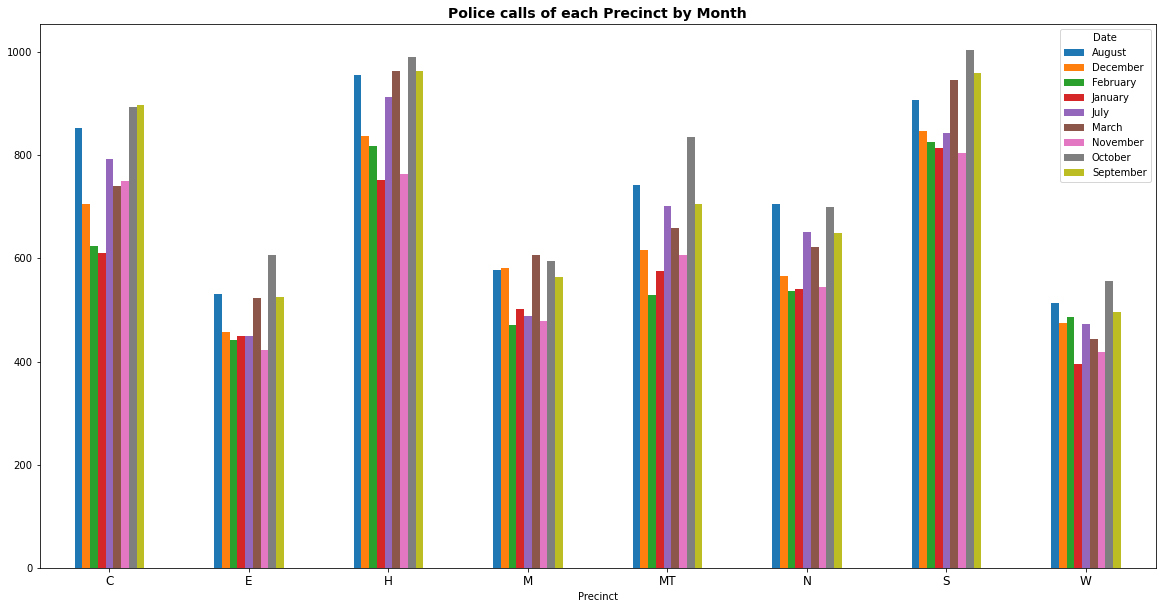

In [75]:
pd.crosstab(police_calls_date['Precinct'], police_calls_date['Date']).plot(kind = 'bar',
                                                                          figsize = (20, 10))
plt.xticks(rotation = 0,                                               
           fontsize = 12)                   
plt.title('Police calls of each Precinct by Month',                             
         fontsize = 14,
         fontweight = 'bold');

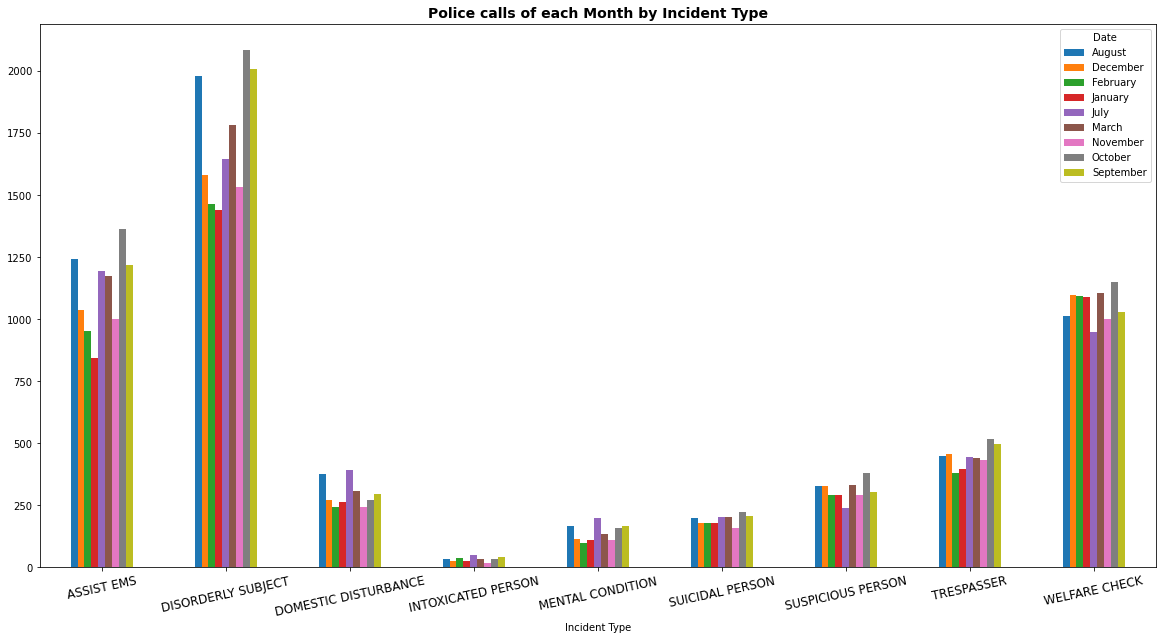

In [76]:
pd.crosstab(police_calls_date['Incident Type'], police_calls_date['Date']).plot(kind = 'bar',
                                                                          figsize = (20, 10))
plt.xticks(rotation = 12,                                               
           fontsize = 12)                   
plt.title('Police calls of each Month by Incident Type',                             
         fontsize = 14,
         fontweight = 'bold');

In [77]:
pd.crosstab(police_calls_date['Precinct'], police_calls_date['Created'])

Created,00:00:00,00:00:02,00:00:09,00:00:13,00:00:14,00:00:15,00:00:17,00:00:20,00:00:28,00:00:35,...,23:59:38,23:59:43,23:59:44,23:59:47,23:59:48,23:59:49,23:59:53,23:59:54,23:59:57,23:59:58
Precinct,,,,,,,,,,,,,,,,,,,,,
C,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1,1,0,0
E,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
H,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
M,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
MT,0,0,0,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
N,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
S,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,2,0,0,0,1
W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
police_calls_hour=police_calls_filtered.copy()

In [79]:
#checking to see if police_calls_hour ('Created') is an object or datetime
police_calls_hour.dtypes

Precinct         object
Date             object
Created          object
Address          object
Incident Type    object
Priority         object
dtype: object

In [80]:
#changing Created to datetime (it was an object) and saving it back to police_calls_hour
police_calls_hour['Created']=pd.to_datetime(police_calls_hour['Created'])

In [81]:
#df['col'].strftime('%I:%M:%S %p')- this regex will change military time to standart time with AM and PM
#police_calls_hour['Created'].dt.strftime('%I:%M:%S %p')

# Changing it to .dt.hour to have a round figure to use crosstab. the above method wont work in crosstab since each
#time will have mins and secs and pandas will have a bunch of rows for each time.

police_calls_hour['Created']=pd.to_datetime(police_calls_hour['Created']).dt.hour


In [82]:
police_calls_hour

,Precinct,Date,Created,Address,Incident Type,Priority
0,C,07-01-2021,1,639 LAFAYETTE ST,INTOXICATED PERSON,2
1,C,07-01-2021,3,920 BROADWAY,WELFARE CHECK,2
2,C,07-01-2021,5,110 4TH AVE S,DISORDERLY SUBJECT,2
3,C,07-01-2021,5,800 4TH AVE S,SUSPICIOUS PERSON,2
4,C,07-01-2021,8,1033 DEMONBREUN ST,TRESPASSER,2
...,...,...,...,...,...,...
48014,W,03-31-2022,11,3811 HILLSBORO PIKE,TRESPASSER,2
48015,W,03-31-2022,12,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2
48016,W,03-31-2022,17,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2
48017,W,03-31-2022,20,2828 KENWAY RD,SUSPICIOUS PERSON,2


In [83]:
pd.crosstab(police_calls_hour['Precinct'], police_calls_hour['Created'])

Created,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Precinct,,,,,,,,,,,,,,,,,,,,,
C,361,333,305,229,212,170,203,240,240,235,...,314,319,320,321,355,332,333,361,343,368
E,140,129,103,81,67,60,90,107,126,165,...,260,265,295,262,266,239,235,249,220,197
H,300,220,200,163,152,147,175,205,263,308,...,456,478,528,428,470,442,440,405,356,315
M,142,120,120,91,95,70,90,113,152,161,...,293,346,307,343,323,276,284,245,201,189
MT,238,211,195,160,135,102,138,178,195,228,...,290,334,358,307,348,291,313,325,254,252
N,190,182,144,131,126,106,104,135,170,210,...,294,313,353,358,314,311,298,280,266,225
S,279,198,174,159,157,145,161,241,265,301,...,400,492,457,481,502,471,441,446,362,315
W,132,106,85,74,65,61,86,97,147,175,...,258,250,272,266,283,248,247,240,222,146


doing an if / else statement to add am pm to time and creating additional column called 'Time' and saving it in there

In [84]:
for ind, row in police_calls_hour.iterrows():
    if row['Created']<=12:
        police_calls_hour.loc[ind, 'Time'] = 'AM'
    else: police_calls_hour.loc[ind, 'Time'] = 'PM'
    
        

making another column called AMPM and adding(Concatinating) both Created column and Time column in the AMPM column

In [85]:
police_calls_hour['AMPM']=police_calls_hour['Created'].astype(str) + police_calls_hour['Time']

In [86]:
police_calls_hour

,Precinct,Date,Created,Address,Incident Type,Priority,Time,AMPM
0,C,07-01-2021,1,639 LAFAYETTE ST,INTOXICATED PERSON,2,AM,1AM
1,C,07-01-2021,3,920 BROADWAY,WELFARE CHECK,2,AM,3AM
2,C,07-01-2021,5,110 4TH AVE S,DISORDERLY SUBJECT,2,AM,5AM
3,C,07-01-2021,5,800 4TH AVE S,SUSPICIOUS PERSON,2,AM,5AM
4,C,07-01-2021,8,1033 DEMONBREUN ST,TRESPASSER,2,AM,8AM
...,...,...,...,...,...,...,...,...
48014,W,03-31-2022,11,3811 HILLSBORO PIKE,TRESPASSER,2,AM,11AM
48015,W,03-31-2022,12,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2,AM,12AM
48016,W,03-31-2022,17,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2,PM,17PM
48017,W,03-31-2022,20,2828 KENWAY RD,SUSPICIOUS PERSON,2,PM,20PM


In [88]:
police_calls_filtered

,Precinct,Date,Created,Address,Incident Type,Priority
0,C,07-01-2021,01:57:16,639 LAFAYETTE ST,INTOXICATED PERSON,2
1,C,07-01-2021,03:02:52,920 BROADWAY,WELFARE CHECK,2
2,C,07-01-2021,05:44:47,110 4TH AVE S,DISORDERLY SUBJECT,2
3,C,07-01-2021,05:49:07,800 4TH AVE S,SUSPICIOUS PERSON,2
4,C,07-01-2021,08:01:06,1033 DEMONBREUN ST,TRESPASSER,2
...,...,...,...,...,...,...
48014,W,03-31-2022,11:46:52,3811 HILLSBORO PIKE,TRESPASSER,2
48015,W,03-31-2022,12:24:06,7277 CHARLOTTE PIKE,SUICIDAL PERSON,2
48016,W,03-31-2022,17:59:25,MURPHY RD / 42ND AVE N,DISORDERLY SUBJECT,2
48017,W,03-31-2022,20:31:47,2828 KENWAY RD,SUSPICIOUS PERSON,2


In [87]:
assist_ems=police_calls_filtered.copy()